- item_list, user_list 파일 만들기

In [1]:
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.listdir('../Data')

['elec_data.csv',
 'weight*0.01.npy',
 's_mean_adj_mat.npz',
 's_adj_mat.npz',
 's_norm_adj_mat.npz',
 'train.txt',
 'asin_list.txt',
 '.ipynb_checkpoints',
 'yelp_user_id_list.txt',
 '02_yelp_academic_dataset_review.json',
 'test.txt',
 'reviewerID_list.txt',
 'yelp_data.csv',
 'train_test.txt',
 'elec_data(to_list,overall_men).csv',
 'yelp_business_id_list.txt',
 'elec_meta.csv']

In [4]:
elec = pd.read_csv('../Data/elec_data.csv')

In [5]:
elec

,overall,reviewerID,asin
0,4.0,A2BZ7MYTSNYMEW,0060786817
1,5.0,A2GQ0WGM9BYX9O,0060786817
2,5.0,A1ER5AYS3FQ9O3,0151004714
3,1.0,A3U5CZ3PV82JXD,0373250460
4,5.0,A1MG56X36JEZKO,0375503757
...,...,...,...
1697991,5.0,A1KB3JXELNI0A8,B01HJFFHTC
1697992,5.0,A2MIQ3XWXKW7MN,B01HJFU2XI
1697993,4.0,A2IC7D1GD4217,B01HJFRHYA
1697994,5.0,A120TWL6P7XFYC,B01HJFUYFY


In [6]:
# review to dict
reviewerID_set = set(elec['reviewerID'])
reviewerID_dict = {i : n for n, i in enumerate(reviewerID_set)}
elec['reviewerID'] = elec['reviewerID'].apply(lambda x : reviewerID_dict[x])

In [7]:
with open('../Data/reviewerID_list.txt', 'w', encoding = 'UTF-8') as f:
    f.write(str(reviewerID_dict))
    f.close()

In [32]:
# asin to dictreviewer
asin_set = set(elec['asin'])
asin_dict = {i : n for n, i in enumerate(asin_set)}
elec['asin'] = elec['asin'].apply(lambda x : asin_dict[x])

In [49]:
with open('../Data/asin_list.txt', 'w', encoding = 'UTF-8') as f:
    f.write(str(asin_dict))
    f.close()

In [58]:
# 컬럼 순서 바꿈
elec = elec[['reviewerID', 'asin', 'overall']]

In [59]:
elec

,reviewerID,asin,overall
0,3319,74138,4.0
1,17157,74138,5.0
2,41082,137904,5.0
3,43777,181551,1.0
4,47696,51323,5.0
...,...,...,...
1697991,11004,149552,5.0
1697992,7583,137568,5.0
1697993,24892,192994,4.0
1697994,19188,75907,5.0


In [65]:
asin_overall = elec.groupby(by = 'asin').mean()

In [70]:
asin_overall = asin_overall.drop('reviewerID', axis = 1)

In [97]:
sum(elec['asin'].value_counts() <= 3) / 259174

0.7164491808591911

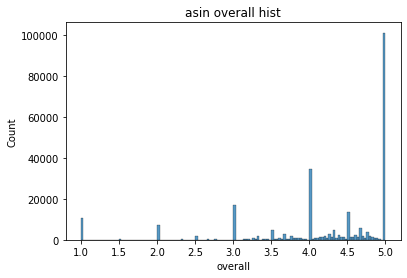

In [120]:
sns.histplot(asin_overall['overall'])

plt.title('asin overall hist')
plt.show()

- 단점
- 제품에 대해 평가가 3개 이하인 것들이 185685개 있음
- 71.6% 를 차지함 

In [132]:
asin_overall_dict = asin_overall['overall'].to_dict()

In [142]:
elec['asin_overall_mean'] = elec['asin'].apply(lambda x : asin_overall_dict[x])

In [150]:
elec

,reviewerID,asin,overall,asin_overall_mean
0,3319,74138,4.0,4.5
1,17157,74138,5.0,4.5
2,41082,137904,5.0,5.0
3,43777,181551,1.0,1.0
4,47696,51323,5.0,5.0
...,...,...,...,...
1697991,11004,149552,5.0,3.6
1697992,7583,137568,5.0,5.0
1697993,24892,192994,4.0,4.0
1697994,19188,75907,5.0,5.0


In [154]:
elec.to_csv('../Data/elec_data(to_list,overall_men).csv', index = False)

In [155]:
pd.read_csv('../Data/elec_data(to_list,overall_men).csv')

,reviewerID,asin,overall,asin_overall_mean
0,3319,74138,4.0,4.5
1,17157,74138,5.0,4.5
2,41082,137904,5.0,5.0
3,43777,181551,1.0,1.0
4,47696,51323,5.0,5.0
...,...,...,...,...
1697991,11004,149552,5.0,3.6
1697992,7583,137568,5.0,5.0
1697993,24892,192994,4.0,4.0
1697994,19188,75907,5.0,5.0
